In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# Work In Progress...

 I will contunue to work on this project exploring different questions and visualizing them

# Exploratory Data Analysis & Visualization

The purpose of this notebook is to practice Data Visualization, and hopefully learn a few things along the way! 

Whilst I won't go on to build a predictive model in this case, the visualizations should help build your intuitions about what could be salient features in a model. Remember, the visualizations have a purpose - they're helping you to discover & understand your data.

**Questions I want to answer**:

- Are there features that seem to lead to poor performance in exams?

We see that Parental Education, if the student receives Free lunches, and whether or not the student completed a Test Preparation course all have a large impact on Student Performance. 

I defined a special group that contains students that have the lowest parent level of education, recieve free lunches, and have not completed a test preparation course - these are by far the worst performing students and should recieve special attention from education providers.

- Are certain groups performing worse than others? If so, can we answer why?

We see differences between and within groups. But Group A perform worse overall. The answer lies in all the above listed factors, which themselves seem to pertain to parental socio-economic level.

- Which factors seem to lead to success?

Success seems to be highly related to, yet again, parental socio-economic status.

Here we assume that parents with a higher socio-economic status **do not** require free lunches for their children, and that they themselves received a good education - often going to university/college. 

I begin with some data cleaning, although it wasn't necessary in this case, usually this is an essential step. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))
import warnings
import matplotlib
import matplotlib.ticker as mtick
import seaborn as sns
import squarify
from sklearn import preprocessing
warnings.filterwarnings("ignore")

plt.rcParams['axes.facecolor'] = "#fbfbfb"
plt.rcParams['figure.facecolor'] ="#fbfbfb"

df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')


['students-performance-in-exams']


In [3]:
df.isnull().shape #No blanks, we're good to go

(1000, 8)

# Feature Engineering

This will offer flexibility and also the opportunity to surface previously hidden insights.

View the code-block below if you wish.

In [4]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']

df['mean_score'] = df['total_score']/3

df['placing'] = df['mean_score'].apply(lambda x: "A*" if x > 90 else "A" if x > 80 else "B" if x > 70 else "C" if x > 60 else "D or Lower")

placing_order = ['A*','A','B','C','D or Lower']

# apply num value to pare ed level

df['pare_ed_num'] = df['parental level of education'].map({'some high school':0, 'high school':1, 'some college':2,"associate's degree":3,"bachelor's degree":4,"master's degree":5})

# make dummies

df['lunch_dummy'] = df['lunch'].apply(lambda x: 1 if x == "free/reduced" else 0)

df['test_prep_dummy'] = df['test preparation course'].apply(lambda x: 1 if x == "completed" else 0)

df['gender_dummy'] = df['gender'].apply(lambda x: 1 if x == "male" else 0)


def flag_df(df):

    if (df['lunch'] == 'free/reduced') and (df['test preparation course'] == 'none'):
        return 1
    else:
        return 0
    
def flag2_df(df):

    if (df['lunch'] == 'free/reduced') and (df['test preparation course'] == 'none') and (df['pare_ed_num'] == 0):
        return 1
    else:
        return 0
    
#variable to show those students on free lunches and have no test prep course
df['free_no_course'] = df.apply(flag_df, axis = 1)

df['pare_ed_free_no_course'] = df.apply(flag2_df, axis = 1)


df_conts = df[['math score','reading score','writing score','lunch_dummy','test_prep_dummy','gender_dummy', 'pare_ed_num','pare_ed_free_no_course','total_score','mean_score']]
# Since all tests appear to be out of 100, we'll take a simple mean too

df['mean_score'] = df['total_score']/3


# Let's try some visualization

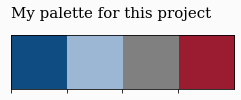

In [5]:
sns.palplot(['#0f4c81', '#9bb7d4', 'gray','#9b1b30'])
plt.title("My palette for this project",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [6]:
# useful data
eth_df = pd.DataFrame(df['race/ethnicity'].value_counts())
eth_df.columns = ['Count']
eth_df['Percentage'] = eth_df['Count'].apply(lambda x: (x/sum(eth_df['Count'])*100))

eth_df = pd.DataFrame(eth_df.unstack()).reset_index(drop=False)
eth_df = eth_df.iloc[5:11, 1:3]
eth_df.columns = ["Group", "Percentage"]
eth_df = eth_df.reset_index(drop=True)
eth_df = eth_df.set_index('Group')
eth_df = eth_df.T

## ind groups

df['Count'] = 1

# splitting data into continents
a_df = df[df["race/ethnicity"]=="group A"]
b_df = df[df["race/ethnicity"]=="group B"]
c_df = df[df["race/ethnicity"]=="group C"]
d_df = df[df["race/ethnicity"]=="group D"]
e_df = df[df["race/ethnicity"]=="group E"]

# A
a_count_df = pd.DataFrame(a_df["race/ethnicity"].value_counts())
a_count_df = a_count_df.reset_index(drop=False)
a_count_df.columns = ["Group","Count"]


b_count_df = pd.DataFrame(b_df["race/ethnicity"].value_counts())
b_count_df = b_count_df.reset_index(drop=False)
b_count_df.columns = ["Group","Count"]


# Ordering
par_ed_order = ['some high school','high school','some college',"associate's degree","bachelor's degree", "master's degree"]


a_ed = a_df['parental level of education'].value_counts()[par_ed_order]
b_ed = b_df['parental level of education'].value_counts()[par_ed_order]
c_ed = c_df['parental level of education'].value_counts()[par_ed_order]
d_ed = d_df['parental level of education'].value_counts()[par_ed_order]
e_ed = e_df['parental level of education'].value_counts()[par_ed_order]

# Gender

x=df.groupby(['gender'])['gender'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

# Overview

Here I show the general composition of our student dataset. 

We see that Group C and D are the most numerous, with Group A being the smallest group. It will be interesting to explore if/how these groups differ in performance. 

Next, I break the overall, and then each group, down by gender. 
Overall there are roughly equal males & females, but groups A, B, & C, are pre-dominated by one gender over the other. Will we notice any performance gaps between the genders?

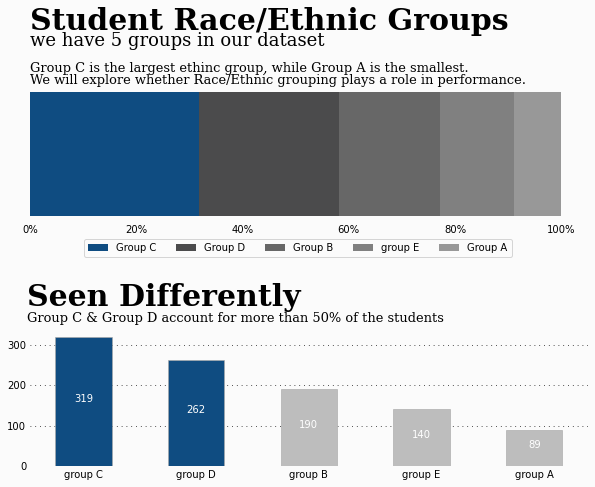

In [7]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,16)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) # create axes


# Color selection
color_map = ["#bdbdbd" for _ in range(6)]
color_map[0] = color_map[1] = "#0f4c81"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color


# Group stacking
ax0.barh(eth_df.index, eth_df['group C'],color="#0f4c81", zorder=3, label="Group C")
ax0.barh(eth_df.index, eth_df['group D'], left=eth_df['group C'],color="#4b4b4c", zorder=3, label="Group D")
ax0.barh(eth_df.index, eth_df['group B'], left=eth_df['group C']+eth_df['group D'],color="#676767", zorder=3, label="Group B")
ax0.barh(eth_df.index, eth_df['group E'], left=eth_df['group C']+eth_df['group D']+eth_df['group B'],color="#808080", zorder=3, label="group E")
ax0.barh(eth_df.index, eth_df['group A'], left=eth_df['group C']+eth_df['group D']+eth_df['group B']+eth_df['group E'],color="#989898", zorder=3, label="Group A")

ax0.xaxis.set_major_formatter(mtick.PercentFormatter())    
ax0.legend(loc='lower center', ncol=6, bbox_to_anchor=(0.48, -0.3))


ax0.text(0, 0.8, 
         'Student Race/Ethnic Groups', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax0.text(0, 0.7, 
         'we have 5 groups in our dataset', 
         fontsize=18, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.53, 
         'Group C is the largest ethinc group, while Group A is the smallest.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.45, 
         'We will explore whether Race/Ethnic grouping plays a role in performance.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')


# Another view
# Order for plotting categorical vars

ethnicity_order = ['group A','group B','group C','group D', 'group E']

ethnicity = df['race/ethnicity'].value_counts()#[ethnicity_order]

# Plot

ax1.bar(ethnicity.index, ethnicity, width=0.5, edgecolor='darkgray',linewidth=0.6,color=color_map)


# Annotations percentage
#annotations - on just one plot in this example
for x, val in zip(ethnicity.index, ethnicity):
    ax1.text(x=x, y=val/2, s=str(val), ha='center', c='white' )
    
ax1.text(-0.5, 395, 
         'Seen Differently', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax1.text(-0.5, 355, 
         'Group C & Group D account for more than 50% of the students', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

# Title & Subtitle
#fig.text(0.125,1.03,'Gender distribution', fontfamily='serif',fontsize=15, fontweight='bold')
#fig.text(0.125,0.92,'We see roughly equivalent males & females in our dataset.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)




ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_axisbelow(True)

ax0.set_yticklabels([])
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

Let's now take a look at gender

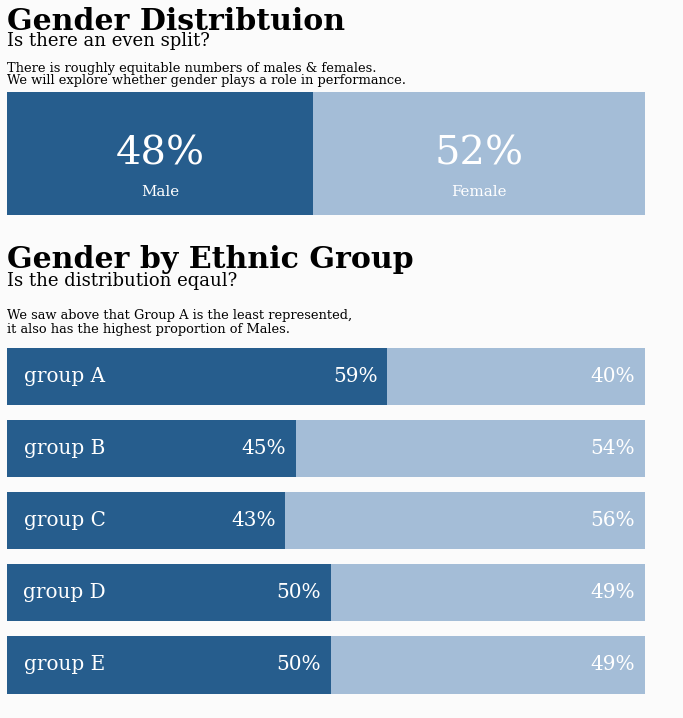

In [8]:
# Setting up figure and axes
fig = plt.figure(figsize=(12,16)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1:3, 0:2]) # create axes
#ax2 = fig.add_subplot(gs[1, 1], ylim=(0, 50)) # create axes
#ax3 = fig.add_subplot(gs[2, 0], ylim=(0, 50)) # create axes
#ax4 = fig.add_subplot(gs[2, 1], ylim=(0, 50)) # create axes
#ax5 = fig.add_subplot(gs[3, 0], ylim=(0, 50)) # create axes
#ax6 = fig.add_subplot(gs[3, 1], ylim=(0, 50)) # create axes

# Color selection
color_map = ["#bdbdbd" for _ in range(6)]
color_map[0] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color


ax0.barh(mf_ratio.index, mf_ratio['male'], color='#0f4c81', alpha=0.9, label='Male')
ax0.barh(mf_ratio.index, mf_ratio['female'], left=mf_ratio['male'], color='#9bb7d4', alpha=0.9, label='Female')

# Annotations percentage
for i in mf_ratio.index:
    ax0.annotate(f"{int(mf_ratio['male'][i]*100)}%", 
                   xy=(mf_ratio['male'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax0.annotate("Male", 
                   xy=(mf_ratio['male'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax0.annotate(f"{int(mf_ratio['female'][i]*100)}%", 
                   xy=(mf_ratio['male'][i]+mf_ratio['female'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax0.annotate("Female", 
                   xy=(mf_ratio['male'][i]+mf_ratio['female'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


## Data

race_gen = df.groupby('race/ethnicity')['gender'].value_counts().unstack().loc[ethnicity_order]
race_gen['sum'] = race_gen.sum(axis=1)
race_gen_ratio = (race_gen.T / race_gen['sum']).T[['male', 'female']][::-1]

## Plot


ax1.barh(race_gen_ratio.index, race_gen_ratio['male'], 
        color='#0f4c81', alpha=0.9, label='Male')
ax1.barh(race_gen_ratio.index, race_gen_ratio['female'], left=race_gen_ratio['male'], 
        color='#9bb7d4', alpha=0.9, label='Female')

# male percentage
for i in race_gen_ratio.index:
    ax1.annotate(f"{int(race_gen_ratio['male'][i]*100)}%",
                   xy=(race_gen_ratio['male'][i]-0.05, i),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')

for i in race_gen_ratio.index:
    ax1.annotate(f"{int(race_gen_ratio['female'][i]*100)}%", 
                   xy=(race_gen_ratio['male'][i]+race_gen_ratio['female'][i]-0.05, i),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')
    # group name
    ax1.annotate(i,
                   xy=(0.09, i),
                   va = 'center', ha='center',fontsize=20, fontweight='light', fontfamily='serif',
                   color='white')
    
    
    
ax0.text(0, 0.8, 
         'Gender Distribtuion', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax0.text(0, 0.7, 
         'Is there an even split?', 
         fontsize=18, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.53, 
         'There is roughly equitable numbers of males & females.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.45, 
         'We will explore whether gender plays a role in performance.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')


ax1.text(0, 5.5, 
         'Gender by Ethnic Group', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax1.text(0, 5.25, 
         'Is the distribution eqaul?', 
         fontsize=18, 
         fontweight='light', 
         fontfamily='serif')

ax1.text(0, 4.8, 
         'We saw above that Group A is the least represented,', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax1.text(0, 4.6, 
         'it also has the highest proportion of Males.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')


for s in ['top', 'left', 'right', 'bottom']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

ax0.set_yticklabels([])
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)


ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])

plt.show()

# Let's look at the student scores 


In [9]:
conts = ['math score', 'reading score', 'writing score']

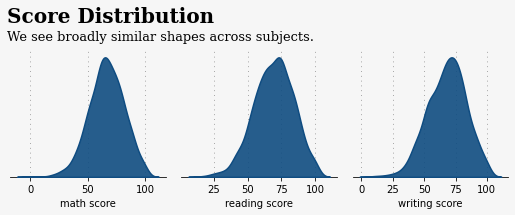

In [10]:
fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#f6f6f6"



run_no = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(run_no)], color='#0f4c81', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        run_no += 1
        
ax0.text(-20, 0.034, 'Score Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.03, 'We see broadly similar shapes across subjects.', fontsize=13, fontweight='light', fontfamily='serif')


plt.show()

The scores seem pretty uniform across subjects. 

Where is A & above in these plots? 

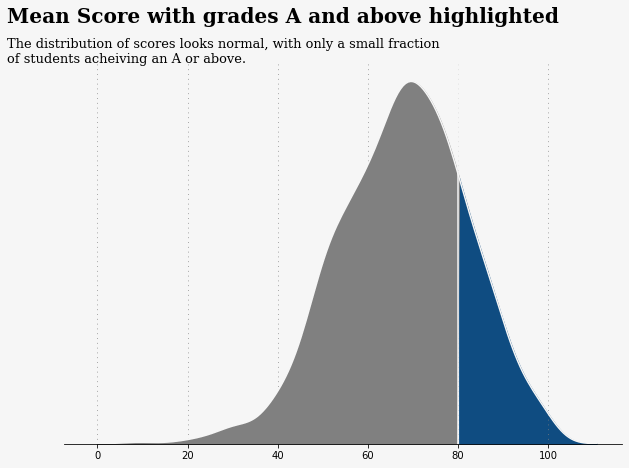

In [11]:
fig = plt.figure(figsize=(10, 7), facecolor='#f6f6f6')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#f6f6f6"


x0 = 80
x1 = 120

ax = sns.kdeplot(df['mean_score'],color='#f6f6f6')
ax.set_facecolor(background_color)
kde_x, kde_y = ax.lines[0].get_data()

#plotting the  lines
p1 = plt.axvline(x=x0,color=background_color)
#p2 = plt.axvline(x=x1,color='#EF9A9A')


ax.fill_between(kde_x, kde_y, where=(kde_x>x0) & (kde_x<x1) , 
                interpolate=True, color='#0f4c81')

ax.fill_between(kde_x, kde_y, where=(kde_x<x0) & (kde_x>0) , 
                interpolate=True, color='gray')

ax.tick_params(axis='y', left=False)
ax.get_yaxis().set_visible(False)
for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)
ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
#ax.set_xlabel('Mean Score',fontsize=15,fontfamily='serif',loc='left')
ax.set_xlabel('',fontsize=15,fontfamily='serif',loc='left')

ax.text(-20, 0.032, 'Mean Score with grades A and above highlighted', fontsize=20, fontweight='bold', fontfamily='serif')
ax.text(-20, 0.029, 'The distribution of scores looks normal, with only a small fraction\nof students acheiving an A or above.', fontsize=13, fontweight='light', fontfamily='serif')



plt.show()

So overall, our students seem to be quite uniform - that is, there are no significant skews positive or negative in the data.

Does this change if we focus on specific groups?

# Performance differences within & between groups

So now we know the overall make-up of our dataset we can explore performance differences

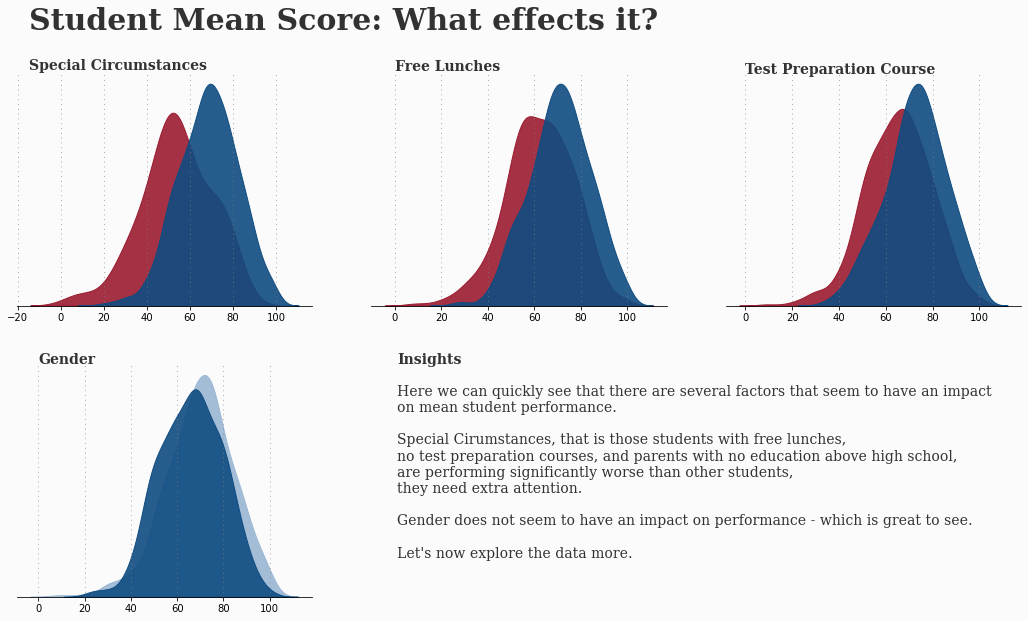

In [12]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])


# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color
ax2.set_facecolor(background_color) # axes background color
ax3.set_facecolor(background_color) # axes background color



male_only = df[df['gender'] == 'male']
female_only = df[df['gender'] == 'female']

# gender
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(female_only["mean_score"], ax=ax3,color="#9bb7d4",alpha=0.9, shade=True, label="Train")
sns.kdeplot(male_only["mean_score"], ax=ax3, color="#0f4c81",alpha=0.9, shade=True, label="Test")
ax3.text(0, 0.03, 'Gender', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.yaxis.set_major_locator(mtick.MultipleLocator(0.01))
#ax0.legend(ncol=2, bbox_to_anchor=(0.75, 2.95), facecolor=background_color, edgecolor=background_color)



# lunches
lunch_only = df[df['lunch'] == 'free/reduced']
nolunch_only = df[df['lunch'] == 'standard']
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(lunch_only["mean_score"], ax=ax1,color="#9b1b30",alpha=0.9, shade=True, label="Train")
sns.kdeplot(nolunch_only["mean_score"], ax=ax1, color="#0f4c81",alpha=0.9, shade=True, label="Test")
ax1.text(0, 0.0315, 'Free Lunches', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.yaxis.set_major_locator(mtick.MultipleLocator(0.01))
#ax1.legend(ncol=2, bbox_to_anchor=(0.75, 2.95), facecolor=background_color, edgecolor=background_color)

## test prep
test_only = df[df['test preparation course'] == 'completed']
notest_only = df[df['test preparation course'] == 'none']

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(notest_only["mean_score"], ax=ax2, color="#9b1b30",alpha=0.9, shade=True, label="Test")
sns.kdeplot(test_only["mean_score"], ax=ax2,color="#0f4c81",alpha=0.9, shade=True, label="Train")
ax2.text(0, 0.032, 'Test Preparation Course', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.yaxis.set_major_locator(mtick.MultipleLocator(0.01))
#ax2.legend(ncol=2, bbox_to_anchor=(0.75, 2.95), facecolor=background_color, edgecolor=background_color)


## 

spec_only = df[df['pare_ed_free_no_course'] == 1]
nospec_only = df[df['pare_ed_free_no_course'] == 0]

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sns.kdeplot(spec_only["mean_score"], ax=ax0,color="#9b1b30",alpha=0.9, shade=True, label="Train")
sns.kdeplot(nospec_only["mean_score"], ax=ax0, color="#0f4c81",alpha=0.9, shade=True, label="Test")
ax0.text(-15, 0.03, 'Special Circumstances', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(0.01))
#ax3.legend(ncol=2, bbox_to_anchor=(0.75, 2.95), facecolor=background_color, edgecolor=background_color)

ax0.set(yticks=[])
ax1.set(yticks=[])
ax2.set(yticks=[])
ax3.set(yticks=[])

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

ax0.set_ylabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")


ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax2.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax3.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))



ax0.text(-15, 0.035, 'Student Mean Score: What effects it?', 
         fontsize=30, fontweight='bold', fontfamily='serif', color="#323232")

ax3.text(155, 0.03, 'Insights', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

ax3.text(155, 0.003, 
'''
Here we can quickly see that there are several factors that seem to have an impact
on mean student performance.

Special Cirumstances, that is those students with free lunches, 
no test preparation courses, and parents with no education above high school,
are performing significantly worse than other students,
they need extra attention.

Gender does not seem to have an impact on performance - which is great to see.

Let's now explore the data more.
''', 
         fontsize=14, fontfamily='serif', color="#323232")

plt.show()

In [13]:
df.groupby('race/ethnicity')['mean_score'].mean().reset_index()
df.groupby('race/ethnicity')['mean_score'].mean().reset_index()


spec = df[df['pare_ed_free_no_course'] == 1]
nospec = df[df['pare_ed_free_no_course'] == 0]

spec.groupby('race/ethnicity')['mean_score'].mean().reset_index()


full = df.groupby('race/ethnicity')['mean_score'].mean().reset_index()


Can we view mean student scores across groups in an interesting way?

Sometimes charts don't need to be perfectly clear. Value can be added if a viewer can instantly grasp a general distribution. This adds to the viewer's understanding.

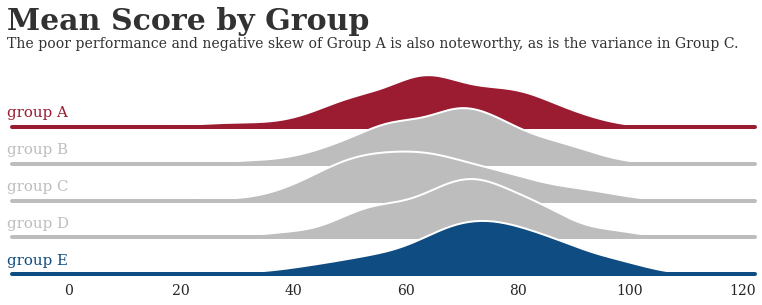

In [14]:

# we generate a pd.Serie with the mean score for each group (used later for colors in the FacetGrid plot), and we create a new column
group_mean_serie = df.groupby('race/ethnicity')['mean_score'].mean()
df['grp_mean_score'] = df['race/ethnicity'].map(group_mean_serie)

# dict
group_dict = {1: 'group A', 2: 'group B', 3: 'group C', 4: 'group D', 5: 'group E'}

##

color_map = ["#bdbdbd" for _ in range(6)]
color_map[4] = "#0f4c81"
color_map[1] = "#9b1b30"


sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# if you want a different color for each month
#pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df, row='race/ethnicity', hue='grp_mean_score', aspect=15, height=0.75, palette=color_map)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'mean_score',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'mean_score', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=4, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-11, 0.005, group_dict[i+1], fontsize=15,fontfamily='serif',color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.4)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=14,fontfamily='serif',)
#plt.xlabel('Mean Score', fontfamily='serif', fontsize=15)


ax.text(-11,0.126,'Mean Score by Group',
               fontsize=30,
               fontweight='bold',fontfamily='serif',color='#323232')
ax.text(-11,0.117,'The poor performance and negative skew of Group A is also noteworthy, as is the variance in Group C.',
               fontsize=14,
               fontweight=20,fontfamily='serif',color='#323232')
plt.show()

# Exploring performance further

When broken down in to grades, we see a concerning picture. Nearly half of all students in Group A obtain a D or Lower as their final grade.

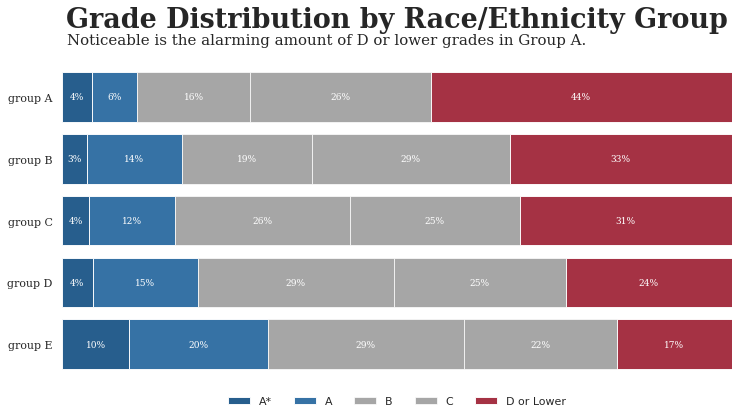

In [15]:
test = df.groupby('race/ethnicity')['placing'].value_counts()

# Order for plotting categorical vars

placing_order = ['A*','A','B','C','D or Lower']


group_order = ['group A','group B','group C','group D','group E']


race_place = df.groupby('race/ethnicity')['placing'].value_counts().unstack().loc[group_order]
race_place['sum'] = race_place.sum(axis=1)

race_place_ratio = (race_place.T / race_place['sum']).T[['A*','A','B','C','D or Lower']][::-1]
race_place_ratio

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax.set_facecolor(background_color) # axes background color

fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(race_place_ratio.index, race_place_ratio['A*'], 
        color='#0f4c81', alpha=0.9, label='A*')
ax.barh(race_place_ratio.index, race_place_ratio['A'], left=race_place_ratio['A*'], 
        color='#20639B', alpha=0.9, label='A')
ax.barh(race_place_ratio.index, race_place_ratio['B'], left=race_place_ratio['A*']+race_place_ratio['A'],
        color='gray', alpha=0.7, label='B')
ax.barh(race_place_ratio.index, race_place_ratio['C'], left=race_place_ratio['A*']+race_place_ratio['A']+race_place_ratio['B'], 
        color='gray', alpha=0.7, label='C')
ax.barh(race_place_ratio.index, race_place_ratio['D or Lower'],left=race_place_ratio['A*']+race_place_ratio['A']+race_place_ratio['B']+race_place_ratio['C'], 
        color='#9b1b30', alpha=0.9, label='D or Lower')



ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(race_gen_ratio.index, fontfamily='serif', fontsize=11)

# percentage labels for each placing
for i in race_place_ratio.index:
    ax.annotate(f"{int(race_place_ratio['A*'][i]*100)}%", 
                   xy=(race_place_ratio['A*'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')

for i in race_place_ratio.index:
    ax.annotate(f"{int(race_place_ratio['A'][i]*100)}%", 
                   xy=(race_place_ratio['A*'][i]+race_place_ratio['A'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in race_place_ratio.index:
    ax.annotate(f"{int(race_place_ratio['B'][i]*100)}%", 
                   xy=(race_place_ratio['A*'][i]+race_place_ratio['A'][i]+race_place_ratio['B'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in race_place_ratio.index:
    ax.annotate(f"{int(race_place_ratio['C'][i]*100)}%", 
                   xy=(race_place_ratio['A*'][i]+race_place_ratio['A'][i]+race_place_ratio['B'][i]+race_place_ratio['C'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in race_place_ratio.index:
    ax.annotate(f"{int(race_place_ratio['D or Lower'][i]*100)}%", 
                   xy=(race_place_ratio['A*'][i]+race_place_ratio['A'][i]+race_place_ratio['B'][i]+race_place_ratio['C'][i]+race_place_ratio['D or Lower'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.95, 'Grade Distribution by Race/Ethnicity Group', fontsize=27, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.91, 'Noticeable is the alarming amount of D or lower grades in Group A.', fontsize=15,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=5,facecolor='white',edgecolor='white', bbox_to_anchor=(0.5, -0.1))

plt.show()


# We can use a Matrix for a quick overview of our data

This will allow us to spot high-level areas of interest quickly

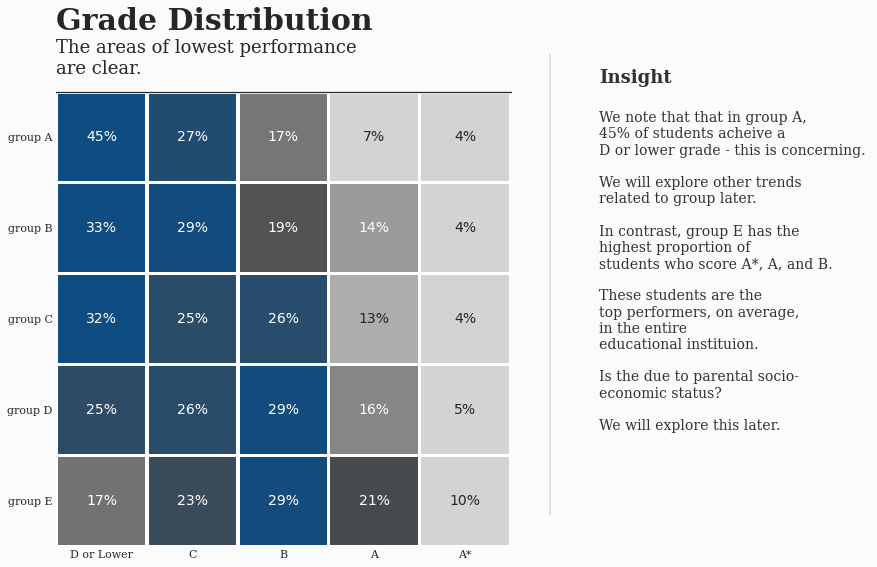

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

placing_order_2 = ['D or Lower','C','B','A','A*']

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax.set_facecolor(background_color) # axes background color

colors = ["lightgray", "#4b4b4c","#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

hm = pd.crosstab(df['race/ethnicity'],df['placing'], normalize = "index").loc[ethnicity_order,placing_order_2]

sns.heatmap(hm,square=True, linewidth=2.5,cbar=False,cmap=cmap,
            annot=True,fmt='1.0%',vmax=.3,vmin=0.1,ax=ax,annot_kws={"fontsize":14})

ax.spines['top'].set_visible(True)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.text(0,-0.68,'Grade Distribution',fontsize=30,fontweight='bold',fontfamily='serif')
ax.text(0,-0.2,'The areas of lowest performance\nare clear.',fontsize=18,fontfamily='serif')

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)

### line

fig.text(1.085, 0.85
         , 'Insight', fontsize=18, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(1.085, 0.22, '''
We note that that in group A, 
45% of students acheive a 
D or lower grade - this is concerning. 

We will explore other trends
related to group later.

In contrast, group E has the
highest proportion of
students who score A*, A, and B. 

These students are the 
top performers, on average, 
in the entire
educational instituion. 

Is the due to parental socio-
economic status? 

We will explore this later.
'''
         , fontsize=14, fontweight='light', fontfamily='serif',color='#323232')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0.1, 0.9], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

##
plt.tight_layout()
plt.show()

# A search for an explanation

We know there are performance gaps between groups, but can other features of our dataset explain why this is occuring? 

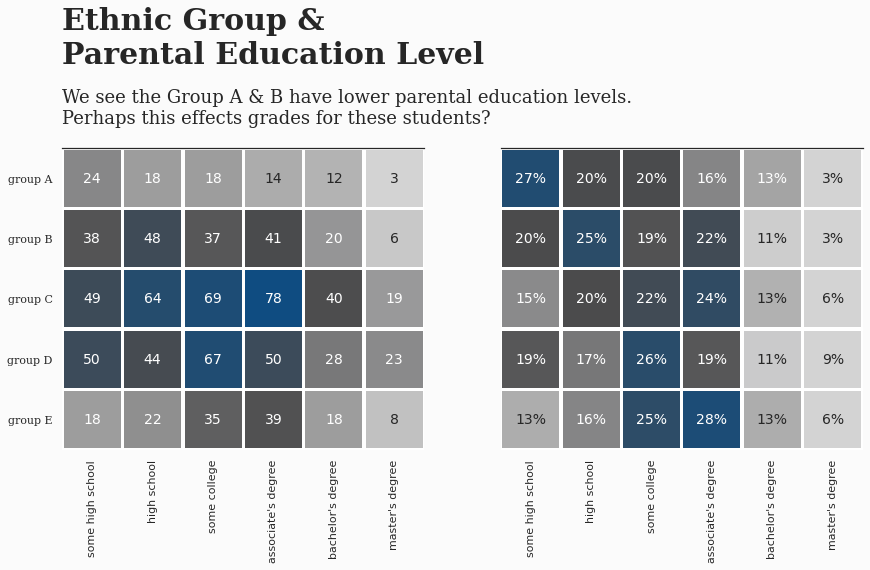

In [17]:
df['count'] = 1
# Setting up figure and axes
fig = plt.figure(figsize=(15,10)) # create figure
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.1, hspace=-0.2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color

colors = ["lightgray", "#4b4b4c","#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(pd.pivot_table(df, values='count', index=['race/ethnicity'], columns=['parental level of education'], aggfunc=np.sum).loc[ethnicity_order,par_ed_order], 
            cmap=cmap,
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax0,
            annot=True,
            fmt="d",annot_kws={"fontsize":14}
           )

ax0.spines['top'].set_visible(True)

ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
#ax0.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)




hm = pd.crosstab(df['race/ethnicity'],df['parental level of education'], normalize = "index").loc[ethnicity_order,par_ed_order]

sns.heatmap(hm,square=True, linewidth=2.5,cbar=False,cmap=cmap,
            annot=True,fmt='1.0%',vmax=.3,vmin=0.1,ax=ax1,annot_kws={"fontsize":14})

ax1.spines['top'].set_visible(True)
#ax1.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
#ax1.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax0.text(0,-1.4,'Ethnic Group & \nParental Education Level',fontsize=30,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.4,'We see the Group A & B have lower parental education levels.\nPerhaps this effects grades for these students?',fontsize=18,fontfamily='serif')



ax0.set_xlabel('')
ax0.set_ylabel('') 
ax1.set_xlabel('')
ax1.set_yticklabels("")
ax1.set_ylabel('') 

#plt.ylabel("Parental Level of Education", fontsize=12, fontweight='light', fontfamily='serif')
#plt.xlabel("Race/Ethnicity", fontsize=12, fontweight='light', fontfamily='serif')

plt.tight_layout()
plt.show()

# Parental Education and grades

So we know that parental education is an important factor when looking at student performance.

Let's view side-by-side the distribution of parental education across our student's groups, 
and also our studen't grades.

This visual paints a clear picture.



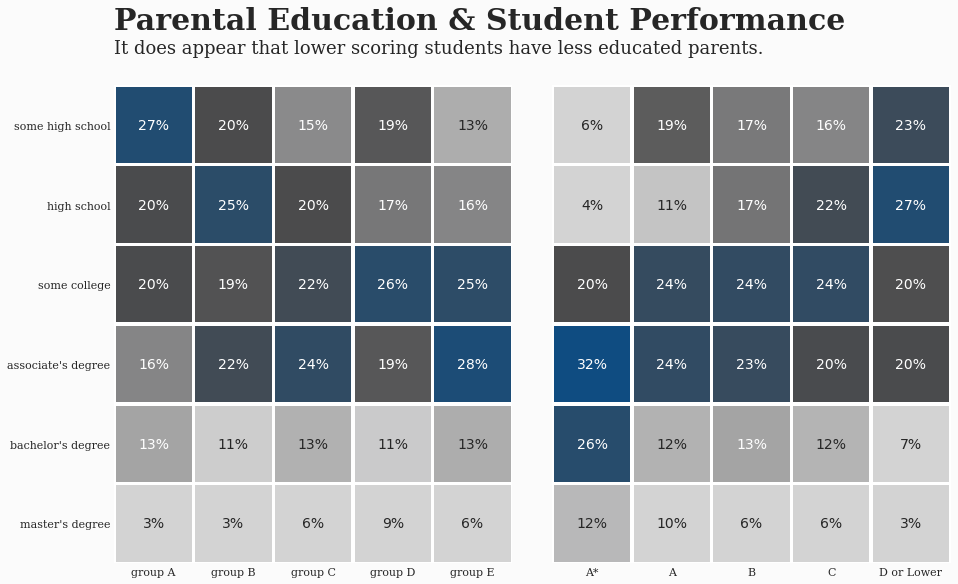

In [18]:
# Setting up figure and axes
fig = plt.figure(figsize=(15,10)) # create figure
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) # create axes

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color

colors = ["lightgray", "#4b4b4c","#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

hm = pd.crosstab(df['race/ethnicity'],df['parental level of education'], normalize = "index").loc[ethnicity_order,par_ed_order]

sns.heatmap(hm.T,square=True, linewidth=2.5,cbar=False,cmap=cmap,
            annot=True,fmt='1.0%',vmax=.3,vmin=0.1,ax=ax0,annot_kws={"fontsize":14})

hm = pd.crosstab(df['placing'],df['parental level of education'], normalize = "index").loc[placing_order,par_ed_order]

sns.heatmap(hm.T,square=True, linewidth=2.5,cbar=False,cmap=cmap,
            annot=True,fmt='1.0%',vmax=.3,vmin=0.1,ax=ax1,annot_kws={"fontsize":14})
#ax1.set_xticklabels("")
ax1.set_yticklabels("")
ax1.set_ylabel('') 
ax0.set_ylabel('')
ax0.set_xlabel('')
ax1.set_xlabel('')
ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()

ax0.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='both', which='both', length=0)


ax0.text(0,-0.7,'Parental Education & Student Performance',fontsize=30,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.4,'It does appear that lower scoring students have less educated parents.',fontsize=18,fontfamily='serif')

plt.show()

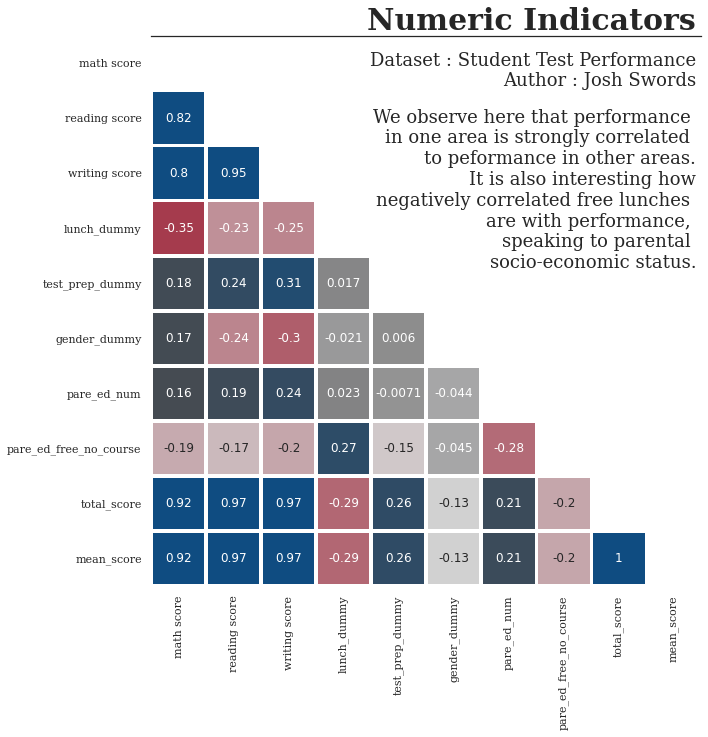

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

corr = df_conts.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

colors = ["#9b1b30","lightgray", "#4b4b4c","#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 0.99, 'Numeric Indicators', fontweight='bold', fontfamily='serif', fontsize=30, ha='right')    
fig.text(0.97, 0.912, 'Dataset : Student Test Performance\nAuthor : Josh Swords', fontweight='light', fontfamily='serif', fontsize=18, ha='right')    

fig.text(0.97, 0.91, '''
We observe here that performance 
in one area is strongly correlated 
to peformance in other areas.
It is also interesting how
negatively correlated free lunches 
are with performance, 
speaking to parental 
socio-economic status.''', 
         fontweight='light', fontfamily='serif', fontsize=18, va='top', ha='right') 

plt.tight_layout()
plt.show()

# To be continued...